In [1]:
# Find performance bottlenecks by timing Python cell execution
%load_ext autotime

# Reload all modules (except those excluded by %aimport) every time before executing the Python code typed
# See https://ipython.org/ipython-doc/stable/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

# Append the root directory to Python path,
# this allows you to store notebooks in `notebooks/` sub-directory and access model Python modules
import sys
sys.path.append("..")

time: 13.6 ms (started: 2021-04-09 11:02:15 +02:00)


In [2]:
import pandas as pd
import numpy as np

time: 389 ms (started: 2021-04-09 11:02:15 +02:00)


In [3]:
from experiments.run import run
from experiments.post_processing import post_process

time: 539 ms (started: 2021-04-09 11:02:15 +02:00)


In [4]:
results, exceptions = run()

Running experiment
Experiment complete
time: 18.3 s (started: 2021-04-09 11:02:16 +02:00)


In [5]:
df = pd.DataFrame(results)
df = post_process(df)
df

,eth_price,eth_supply,eth_staked,supply_inflation,average_effective_balance,number_of_validators,number_of_validators_online,number_of_validators_offline,base_reward,validating_rewards,...,pool_cloud_cloud_costs,staas_full_cloud_costs,staas_self_custodied_cloud_costs,diy_hardware_third_party_costs,diy_cloud_third_party_costs,pool_staas_third_party_costs,pool_hardware_third_party_costs,pool_cloud_third_party_costs,staas_full_third_party_costs,staas_self_custodied_third_party_costs
0,0.000000,1.120000e+08,0.000000e+00,0.000000e+00,3.200000e+10,0,0,0,0.0,0.000000e+00,...,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]
1,1000.000000,1.120000e+08,5.242880e+05,-3.668750e-07,3.200000e+10,16384,16057,327,89440.0,1.436138e+09,...,0.445645,0.0,0.0,0.0,0.0,43.690102,0.0,0.0,16.181519,12.945215
2,1014.440311,1.120000e+08,5.291187e+05,9.890656e-04,3.199988e+10,16535,16205,330,89024.0,1.442634e+09,...,0.449752,0.0,0.0,0.0,0.0,44.521584,0.0,0.0,16.489476,13.19158
3,1011.859669,1.120000e+08,5.339494e+05,9.935435e-04,3.199982e+10,16686,16353,333,85839.0,1.403725e+09,...,0.453859,0.0,0.0,0.0,0.0,43.210777,0.0,0.0,16.003992,12.803193
4,1014.149349,1.120000e+08,5.387801e+05,9.667409e-04,3.199976e+10,16837,16501,336,85467.0,1.410291e+09,...,0.457966,0.0,0.0,0.0,0.0,43.511235,0.0,0.0,16.115272,12.892218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6844,1045.017858,1.120483e+08,3.358068e+07,7.662670e-03,3.199144e+10,1049677,1028722,20955,10819.0,1.112974e+10,...,28.551214,0.0,0.0,0.0,0.0,353.810951,0.0,0.0,131.041093,104.832874
6845,1031.983459,1.120483e+08,3.358551e+07,7.663773e-03,3.199144e+10,1049828,1028870,20958,10819.0,1.113134e+10,...,28.555322,0.0,0.0,0.0,0.0,349.448187,0.0,0.0,129.425255,103.540204
6846,1022.291574,1.120483e+08,3.359034e+07,7.664875e-03,3.199144e+10,1049979,1029018,20961,10819.0,1.113295e+10,...,28.559429,0.0,0.0,0.0,0.0,346.216151,0.0,0.0,128.228204,102.582563
6847,1016.560357,1.120483e+08,3.359517e+07,7.665977e-03,3.199144e+10,1050130,1029166,20964,10819.0,1.113455e+10,...,28.563536,0.0,0.0,0.0,0.0,344.32471,0.0,0.0,127.52767,102.022136


time: 1.37 s (started: 2021-04-09 11:02:34 +02:00)


In [6]:
df = df.drop(df.query('timestep == 0').index)

time: 58.4 ms (started: 2021-04-09 11:02:35 +02:00)


<AxesSubplot:xlabel='timestep'>

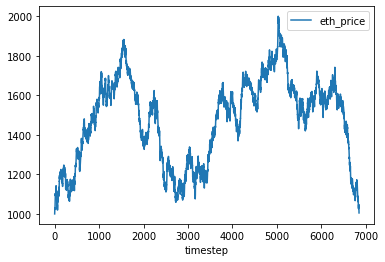

time: 588 ms (started: 2021-04-09 11:02:35 +02:00)


In [7]:
df.plot(x='timestep', y='eth_price')

<AxesSubplot:xlabel='timestep'>

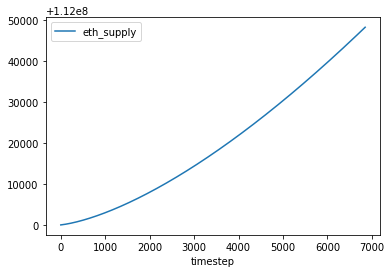

time: 317 ms (started: 2021-04-09 11:02:36 +02:00)


In [8]:
df.plot(x='timestep', y='eth_supply')

<AxesSubplot:xlabel='timestep'>

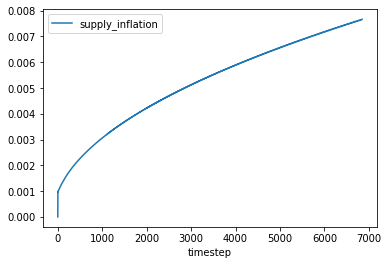

time: 360 ms (started: 2021-04-09 11:02:36 +02:00)


In [9]:
df.plot(x='timestep', y='supply_inflation')

<AxesSubplot:xlabel='timestep'>

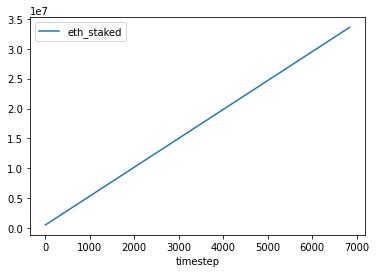

time: 345 ms (started: 2021-04-09 11:02:37 +02:00)


In [10]:
df.plot(x='timestep', y='eth_staked')

<AxesSubplot:xlabel='timestep'>

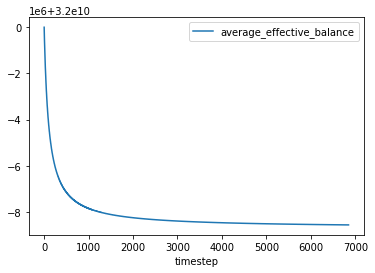

time: 290 ms (started: 2021-04-09 11:02:37 +02:00)


In [11]:
df.plot(x='timestep', y=['average_effective_balance'])

<AxesSubplot:xlabel='timestep'>

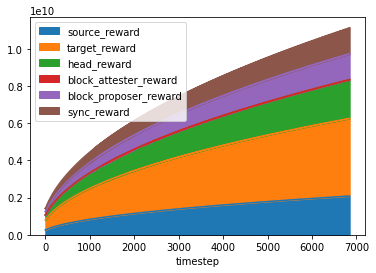

time: 689 ms (started: 2021-04-09 11:02:37 +02:00)


In [12]:
df.plot.area(x='timestep', y=['source_reward', 'target_reward', 'head_reward', 'block_attester_reward', 'block_proposer_reward', 'sync_reward'])

<AxesSubplot:xlabel='timestep'>

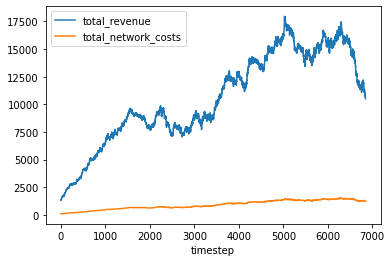

time: 498 ms (started: 2021-04-09 11:02:38 +02:00)


In [13]:
df.plot(x='timestep', y=['total_revenue', 'total_network_costs'])

<AxesSubplot:xlabel='timestep'>

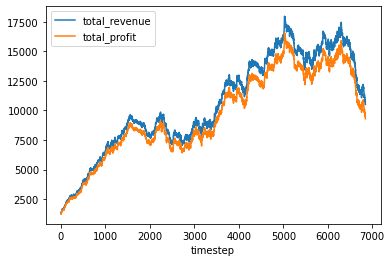

time: 334 ms (started: 2021-04-09 11:02:39 +02:00)


In [14]:
df.plot(x='timestep', y=['total_revenue', 'total_profit'])

<AxesSubplot:xlabel='timestep'>

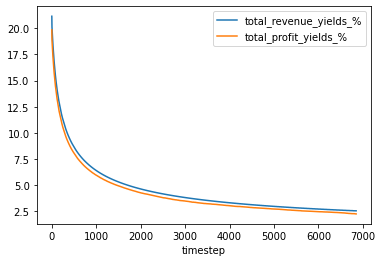

time: 321 ms (started: 2021-04-09 11:02:39 +02:00)


In [15]:
df['total_revenue_yields_%'] = df['total_revenue_yields'] * 100
df['total_profit_yields_%'] = df['total_profit_yields'] * 100
df.plot(x='timestep', y=['total_revenue_yields_%', 'total_profit_yields_%'])

In [16]:
from model.parameters import validator_types

hardware_costs = [validator.type + '_hardware_costs' for validator in validator_types]
cloud_costs = [validator.type + '_cloud_costs' for validator in validator_types]
third_party_costs = [validator.type + '_third_party_costs' for validator in validator_types]

time: 19.1 ms (started: 2021-04-09 11:02:39 +02:00)


<AxesSubplot:xlabel='timestep'>

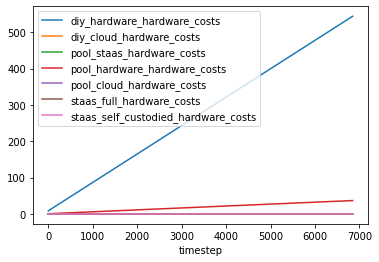

time: 619 ms (started: 2021-04-09 11:02:39 +02:00)


In [17]:
df.plot(x='timestep', y=[*hardware_costs])

<AxesSubplot:xlabel='timestep'>

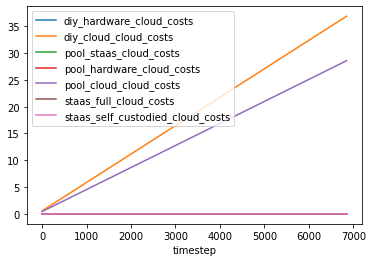

time: 652 ms (started: 2021-04-09 11:02:40 +02:00)


In [18]:
df.plot(x='timestep', y=[*cloud_costs])

<AxesSubplot:xlabel='timestep'>

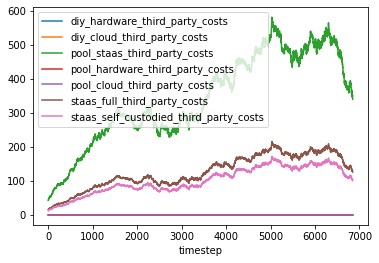

time: 631 ms (started: 2021-04-09 11:02:41 +02:00)


In [19]:
df.plot(x='timestep', y=[*third_party_costs])